In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression

# personal scripts
from plots import eval_hist, single_hist

In [46]:
train_data = np.load('data/train.npz')
train_data.files

['bands', 'lulc']

# Data Exploration

## lulc data
The lulc data contains the labels for the patches in bands.

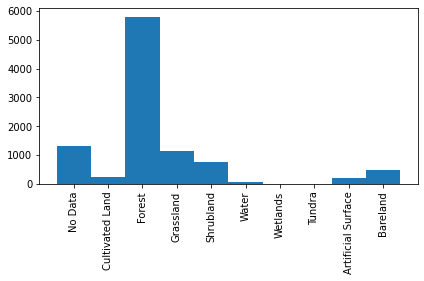

In [47]:
a = train_data['lulc']
single_hist(a)

# Data preparation

In [48]:
bands = train_data['bands']
y_true = train_data['lulc']

In [49]:
X = bands[:, :, 17, 17, :].reshape((10000, 12, 6))
X.shape

(10000, 12, 6)

In [50]:
X_train, X_val, y_train, y_val = train_test_split(X, y_true, test_size=0.3, random_state=42)

In [51]:
nsamples, f_one, f_two = X_train.shape
X_train_d2 = X_train.reshape((nsamples, f_one * f_two))

nsamples, f_one, f_two = X_val.shape
X_val_d2 = X_val.reshape((nsamples, f_one * f_two))

# 1. Decision tree classifier

In [52]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train_d2, y_train)
y_pred = clf.predict(X_val_d2)

Tree depth: 27.00
Number of leafs: 1104.00
Accuracy on training set: 1.00
Accuracy on validation set: 0.66


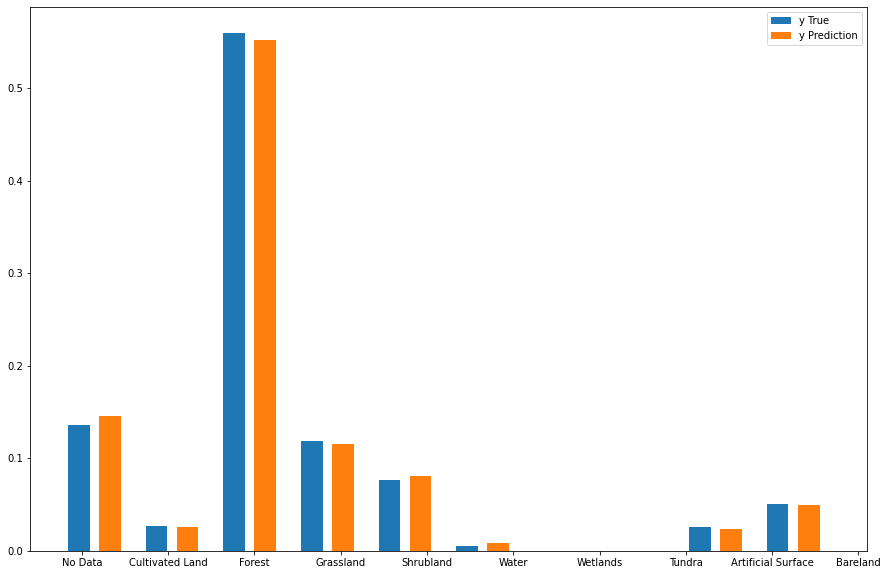

In [53]:
print("Tree depth: {:.2f}".format(clf.get_depth()))
print("Number of leafs: {:.2f}".format(clf.get_n_leaves()))
print("Accuracy on training set: {:.2f}".format(clf.score(X_train_d2, y_train)))
print("Accuracy on validation set: {:.2f}".format(clf.score(X_val_d2, y_val)))
eval_hist(y_val, y_pred)


# 2. Perceptron
Perveptron algorithm with grid search.

From: [machinelearningmastery](https://machinelearningmastery.com/perceptron-algorithm-for-classification-in-python/)

In [54]:
# define model
model = Perceptron()

In [55]:
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [56]:
# define grid
grid = dict()
grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 1000000.0]

# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X_train_d2, y_train)

In [57]:
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))
    

Mean Accuracy: 0.610
Config: {'eta0': 0.0001}
>0.610 with: {'eta0': 0.0001}
>0.610 with: {'eta0': 0.001}
>0.604 with: {'eta0': 0.01}
>0.603 with: {'eta0': 0.1}
>0.607 with: {'eta0': 1.0}
>0.609 with: {'eta0': 10.0}
>0.608 with: {'eta0': 100.0}
>0.609 with: {'eta0': 1000.0}
>0.609 with: {'eta0': 10000.0}
>0.609 with: {'eta0': 1000000.0}


Accuracy on training set: 0.58
Accuracy on validation set: 0.57


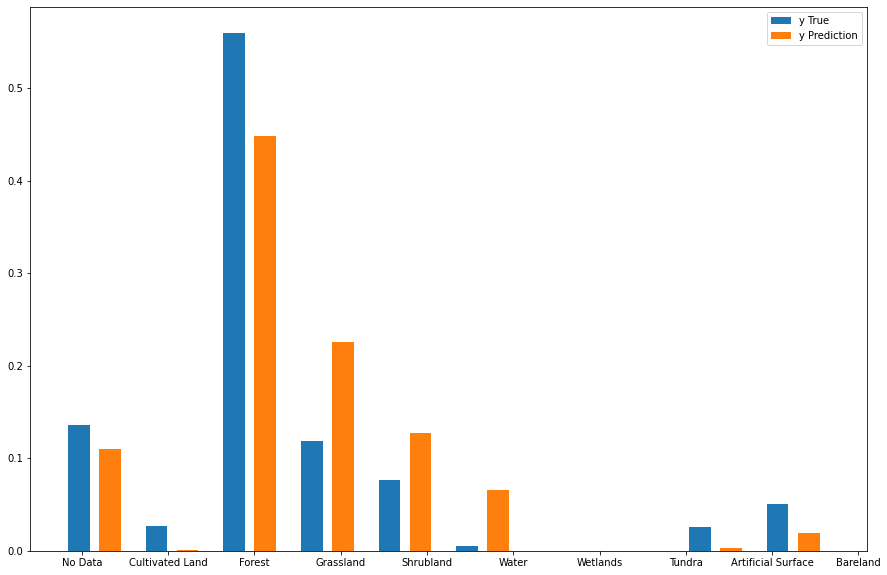

In [58]:
y_pred = search.predict(X_val_d2)

print("Accuracy on training set: {:.2f}".format(search.score(X_train_d2, y_train)))
print("Accuracy on validation set: {:.2f}".format(search.score(X_val_d2, y_val)))

eval_hist(y_val, y_pred)

# 3. Logistic regression

In [60]:
clf = LogisticRegression(random_state=42).fit(X_train_d2, y_train)
y_pred = clf.predict(X_val_d2)

/Users/tillhoffmann/Projects/uni/DA2/satellite-segmentation/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on training set: 0.70
Accuracy on validation set: 0.68


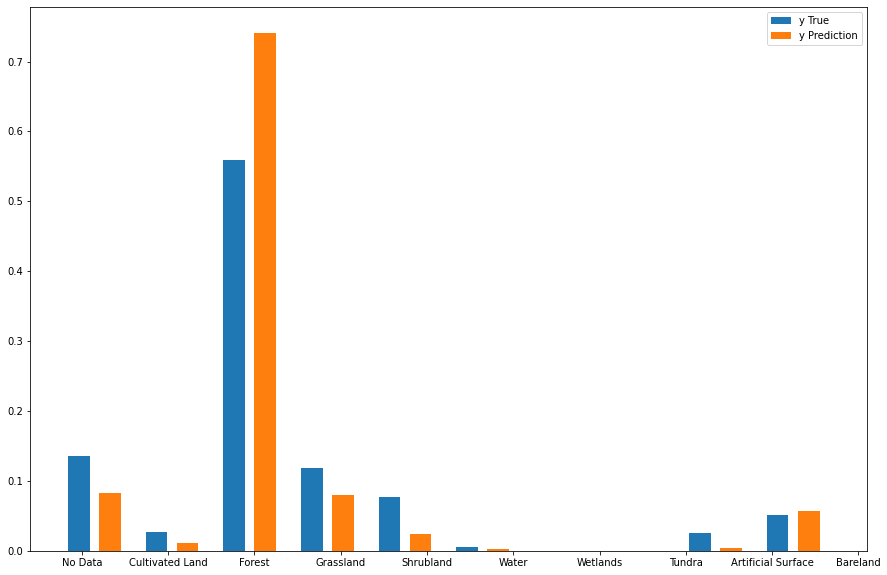

In [61]:
print("Accuracy on training set: {:.2f}".format(clf.score(X_train_d2, y_train)))
print("Accuracy on validation set: {:.2f}".format(clf.score(X_val_d2, y_val)))
eval_hist(y_val, y_pred)